In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
spam = pd.read_csv('spam.csv',encoding='latin-1')

In [7]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [34]:
spam=spam.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
spam=spam.rename(columns={"v1":"Label","v2":"E-mail"})

In [35]:
spam['length']=spam['E-mail'].apply(len)

<Axes: ylabel='Frequency'>

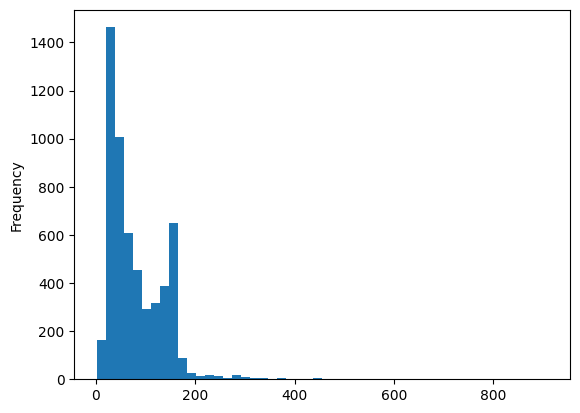

In [36]:
spam['length'].plot(bins=50,kind='hist')

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

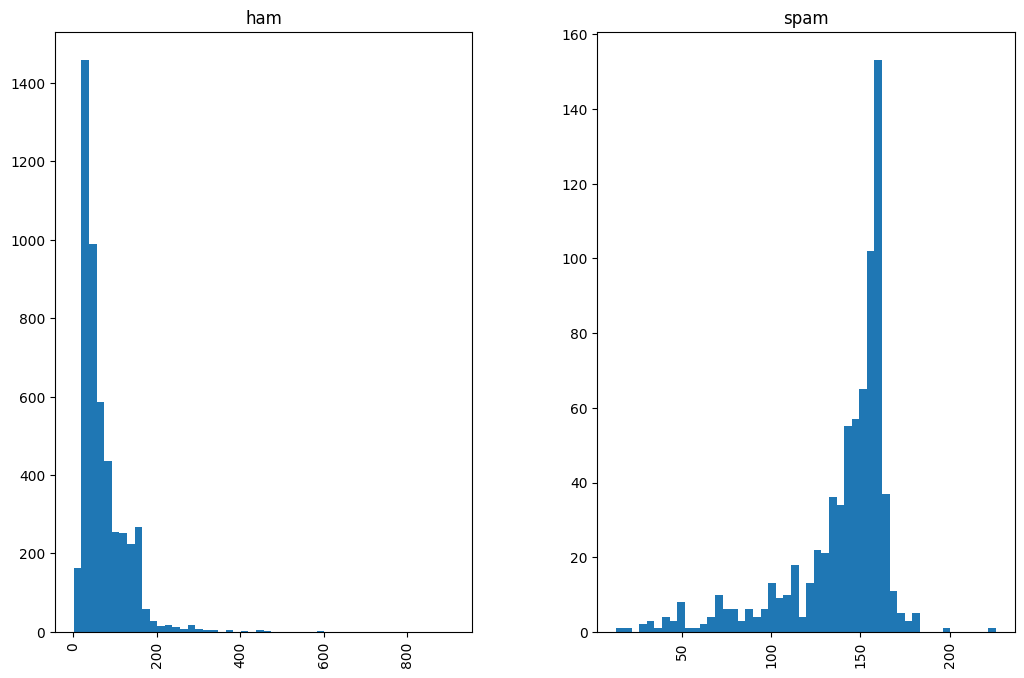

In [37]:
spam.hist(column='length',by='Label',bins=50,figsize=(12,8))

In [38]:
x = spam["E-mail"]
y = spam["Label"]
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [39]:
cv = CountVectorizer()
features = cv.fit_transform(x_train)

In [40]:
model = svm.SVC()
model.fit(features,y_train)

SVC()

In [41]:
features_test = cv.transform(x_test)
print("Accuracy: {}".format(model.score(features_test,y_test)))

Accuracy: 0.9796650717703349


In [42]:
spam.head()

,Label,E-mail,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
